In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A=np.random.randint(1,10,(30,100))
print(np.linalg.matrix_rank(A))
x0=np.random.randint(1,10,(100,1))
b=np.dot(A,x0)

30


In [47]:
xx=np.array([1 for i in range(100)]).reshape(100,1)
v0=np.array([0 for i in range(30)]).reshape(30,1)
tot_iter=100
epsilon=1e-10
def f(x):
    #caculate f(x)
    func=np.sum(x*np.log(x))
    return func

def nable_f(x):
    #caculate nable_f(x)
    func=1+np.log(x)
    return func

def nable2_f(x):
    func=np.eye(100)
    for i in range(100):
        func[i,i]=1/x[i]
    return func


def d_nt(x,v):
    aa=np.zeros((130,130))
    for i in range(100):
        aa[i,i]=1/x[i]
    aa[100:,0:100]=A
    aa[0:100,100:]=np.transpose(A)
    bb=np.zeros((130,1))
    bb[0:100]=nable_f(x)+np.dot(np.transpose(A),v)
    bb[100:]=np.dot(A,x)-b
    bb=-bb
    xx=np.linalg.solve(aa,bb)
    d=xx[0:100]
    v=xx[100:]
    return d,v

def dual(x,v):
    r=np.zeros((130,1))
    r[0:100]=nable_f(x)+np.dot(np.transpose(A),v)
    r[100:]=np.dot(A,x)-b
    func=np.sqrt(np.dot(np.transpose(r),r))
    return func

def judge(x,v,arr):
    #save each error of epoch
    #if it is less or equal epsilon, then return false, else return true
    l=dual(x,v)
    arr.append(l)
    if l > epsilon and len(arr)<tot_iter:
        return True
    return False

def good_x(a,b):
    x=xx
    v=v0
    error=[]
    k=0
    while judge(x,v,error):
        dx,dv=d_nt(x,v)
        t=1
        xk=x+t*dx
        vk=v+t*dv
        while dual(xk,vk) > (1-a*t)*dual(x,v):
            t=b*t
        x=xk
        v=vk
        k=k+1
    
    return x,k,error

In [48]:
alpha=0.1
beta=0.7
x,k,error=good_x(alpha,beta)
while len(error)<100:
    error.append(error[-1])
error=np.array(error).reshape(100)
print(f(x))

698.3110258110688


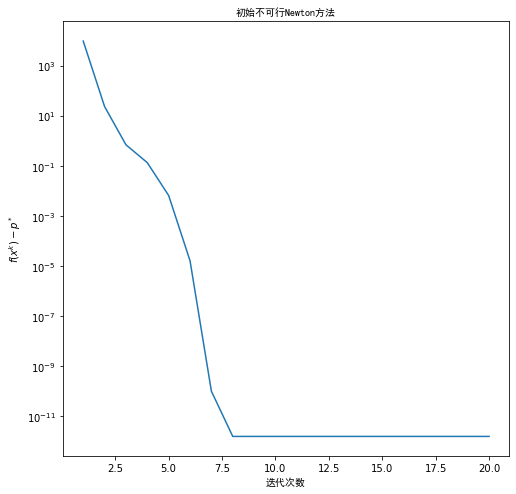

In [49]:
k=np.array([i+1 for i in range(100)])
plt.rcParams['figure.figsize']=(8,8)
plt.plot(k[0:20],error[0:20],label="$\alpha=0.1,\beta=0.7$")
plt.xlabel("迭代次数",fontproperties='simhei')
plt.ylabel("$f(x^k)-p^*$")
plt.title("初始不可行Newton方法",fontproperties='simhei') 
plt.yscale('log')
plt.show()